<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week4/week4_RNN_LSTM_GRU%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 4
1. Buat model Deep learning (PyTorch and Tensorflow). datasets import imdb, gunakan num_words = 30.000 - 50000 dan maxlen = 300 - 500. buat Kompleks model dengan banyak layer dan neuron.
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Visualisasikan matriks akurasi dan loss.
3. Beri penjelasan untuk setiap persamaan matematika yang ada.
4. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan
     T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.
5. Bandingkan hasil models RNN, LSTM, dan GRU. Buatlah analisa di format pdf

In [1]:
# Impor pustaka yang diperlukan
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [2]:

# Memuat dataset IMDb (num_words=50000 dan maxlen=500)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=50000, maxlen=500)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Padding untuk memastikan semua urutan input memiliki panjang yang sama
x_train = pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)

In [4]:
# ==============================
# Model LSTM dengan TensorFlow
# ==============================
model_lstm = tf.keras.Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=500),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:

# Melatih model LSTM
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.7246 - loss: 0.5195 - val_accuracy: 0.8586 - val_loss: 0.3260
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9253 - loss: 0.2022 - val_accuracy: 0.8687 - val_loss: 0.3156
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9664 - loss: 0.1049 - val_accuracy: 0.8486 - val_loss: 0.4536
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9774 - loss: 0.0694 - val_accuracy: 0.8557 - val_loss: 0.4269
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9907 - loss: 0.0329 - val_accuracy: 0.8486 - val_loss: 0.5626


In [6]:
# Evaluasi model LSTM
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm_bin = (y_pred_lstm > 0.5).astype(int)


721/721 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step


In [7]:
# ==============================
# Model GRU dengan TensorFlow
# ==============================
model_gru = tf.keras.Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=500),
    GRU(128, return_sequences=True),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Melatih model GRU
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.6839 - loss: 0.5553 - val_accuracy: 0.8581 - val_loss: 0.3458
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9214 - loss: 0.2139 - val_accuracy: 0.8542 - val_loss: 0.3368
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9617 - loss: 0.1127 - val_accuracy: 0.8573 - val_loss: 0.4219
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.8613 - val_loss: 0.4459
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.8529 - val_loss: 0.4713


In [9]:
# Evaluasi model GRU
y_pred_gru = model_gru.predict(x_test)
y_pred_gru_bin = (y_pred_gru > 0.5).astype(int)

721/721 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step


In [10]:
# ==============================
# Model RNN dengan TensorFlow
# ==============================
model_rnn = tf.keras.Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=500),
    SimpleRNN(128, return_sequences=True),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
# Melatih model RNN
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.5457 - loss: 0.6860 - val_accuracy: 0.5350 - val_loss: 0.8565
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.7491 - loss: 0.5279 - val_accuracy: 0.5040 - val_loss: 0.6988
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.6221 - loss: 0.6633 - val_accuracy: 0.5788 - val_loss: 0.6514
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step - accuracy: 0.7650 - loss: 0.5022 - val_accuracy: 0.7878 - val_loss: 0.4847
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.8955 - loss: 0.2594 - val_accuracy: 0.8434 - val_loss: 0.3780


In [12]:
# Evaluasi model RNN
y_pred_rnn = model_rnn.predict(x_test)
y_pred_rnn_bin = (y_pred_rnn > 0.5).astype(int)


721/721 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step


RNN Model Metrics:
Akurasi: 0.8434424452633861
Presisi: 0.8783445620789221
Recall: 0.7954327551642988
F1 Score: 0.834835109545808
AUC: 0.8431960187139644



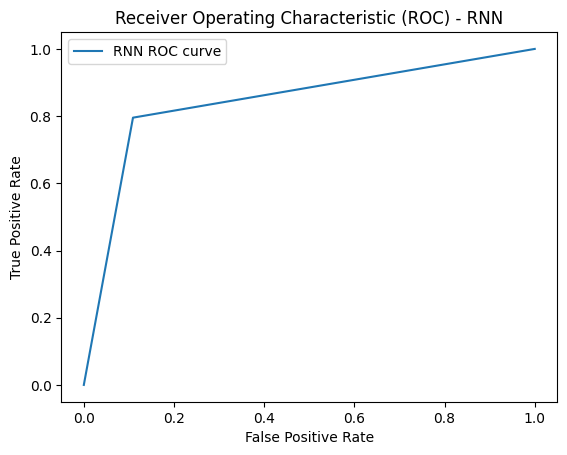

LSTM Model Metrics:
Akurasi: 0.8486017775850856
Presisi: 0.841623148703022
Recall: 0.8568813736598971
F1 Score: 0.8491837263539778
AUC: 0.8486442755117981



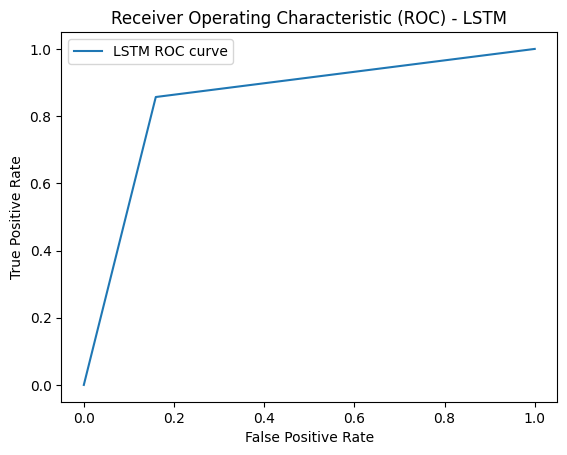

GRU Model Metrics:
Akurasi: 0.852937350964665
Presisi: 0.8494335380091672
Recall: 0.8560969232110172
F1 Score: 0.8527522139260288
AUC: 0.8529535685758329



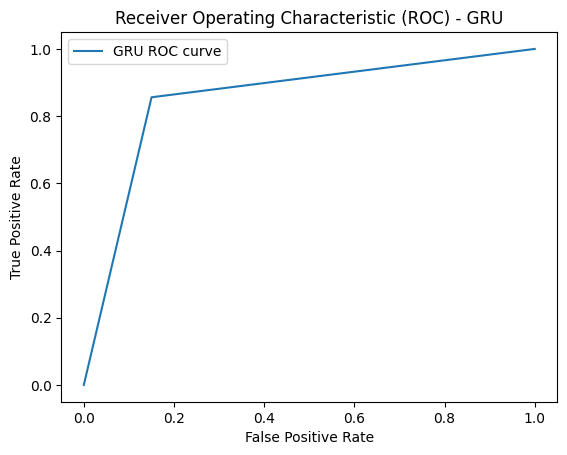

In [13]:

# ==============================
# Calculate evaluation metrics for each model
metrics = {}

for model_name, y_pred_bin in [('RNN', y_pred_rnn_bin), ('LSTM', y_pred_lstm_bin), ('GRU', y_pred_gru_bin)]:
    accuracy = accuracy_score(y_test, y_pred_bin)
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    f1 = f1_score(y_test, y_pred_bin)
    auc = roc_auc_score(y_test, y_pred_bin)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)

    metrics[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr
    }

    # Display the evaluation metrics for each model
    print(f"{model_name} Model Metrics:")
    print(f"Akurasi: {accuracy}")
    print(f"Presisi: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print()

    # Plot ROC Curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend()
    plt.show()

**Penjelasan untuk Persamaan Matematika**
Berikut adalah penjelasan mengenai beberapa komponen utama dalam model yang digunakan:

Persamaan LSTM, GRU, dan RNN:



Model-model tersebut termasuk dalam jenis Recurrent Neural Networks (RNN). Pada dasarnya, mereka digunakan untuk memproses urutan data (seperti teks atau urutan waktu).

LSTM (Long Short-Term Memory):

LSTM menggunakan tiga gerbang utama untuk memodifikasi keadaan memori:

Forget Gate: Mengatur bagian dari informasi sebelumnya yang harus "dilupakan".

Input Gate: Memutuskan informasi baru yang akan dimasukkan ke dalam memori.

Output Gate: Menentukan informasi mana yang akan diekstrak dari memori dan dikirim ke output.

Persamaan LSTM:

Forget Gate:

𝑓
𝑡
=
𝜎
(
𝑊
𝑓
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑓
)
f
t
​
 =σ(W
f
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
f
​
 )
Input Gate:

𝑖
𝑡
=
𝜎
(
𝑊
𝑖
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑖
)
i
t
​
 =σ(W
i
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
i
​
 )
𝐶
~
𝑡
=
tanh
⁡
(
𝑊
𝐶
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝐶
)
C
~
  
t
​
 =tanh(W
C
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
C
​
 )
Output Gate:

𝑜
𝑡
=
𝜎
(
𝑊
𝑜
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑜
)
o
t
​
 =σ(W
o
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
o
​
 )
Memori:

𝐶
𝑡
=
𝑓
𝑡
⋅
𝐶
𝑡
−
1
+
𝑖
𝑡
⋅
𝐶
~
𝑡
C
t
​
 =f
t
​
 ⋅C
t−1
​
 +i
t
​
 ⋅
C
~
  
t
​

Output:

ℎ
𝑡
=
𝑜
𝑡
⋅
tanh
⁡
(
𝐶
𝑡
)
h
t
​
 =o
t
​
 ⋅tanh(C
t
​
 )
GRU (Gated Recurrent Unit):

GRU adalah variasi dari LSTM yang lebih sederhana karena hanya memiliki dua gerbang utama: reset gate dan update gate.

Persamaan GRU:

Update Gate:

𝑧
𝑡
=
𝜎
(
𝑊
𝑧
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑧
)
z
t
​
 =σ(W
z
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
z
​
 )
Reset Gate:

𝑟
𝑡
=
𝜎
(
𝑊
𝑟
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑟
)
r
t
​
 =σ(W
r
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
r
​
 )
Kandidat Memori:

ℎ
~
𝑡
=
tanh
⁡
(
𝑊
ℎ
⋅
[
𝑟
𝑡
⋅
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
ℎ
)
h
~
  
t
​
 =tanh(W
h
​
 ⋅[r
t
​
 ⋅h
t−1
​
 ,x
t
​
 ]+b
h
​
 )
Output:

ℎ
𝑡
=
(
1
−
𝑧
𝑡
)
⋅
ℎ
~
𝑡
+
𝑧
𝑡
⋅
ℎ
𝑡
−
1
h
t
​
 =(1−z
t
​
 )⋅
h
~
  
t
​
 +z
t
​
 ⋅h
t−1
​

RNN (Recurrent Neural Network):

RNN lebih sederhana dibandingkan LSTM dan GRU, dan biasanya digunakan untuk urutan yang lebih pendek atau di mana hubungan jangka panjang tidak terlalu penting.

Persamaan RNN:

Output:

ℎ
𝑡
=
tanh
⁡
(
𝑊
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
)
h
t
​
 =tanh(W⋅[h
t−1
​
 ,x
t
​
 ]+b)